In [2]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader

class Dataset(Dataset):
    def __init__(self):
    # 데이터셋의 전처리를 해주는 부분
        #train_data = pd.read_csv('C:/Users/Soyoung Cho/Desktop/NMT Project/dataset/train.csv')
        test_data = pd.read_csv('C:/Users/Soyoung Cho/Desktop/NMT Project/dataset/test.csv')
        #sample_data = pd.read_csv('C:/Users/Soyoung Cho/Desktop/NMT Project/dataset/sample.csv')

        self.Kor_data = test_data['Korean']
        self.Eng_data = test_data['English']

    def __len__(self):
    # 데이터셋의 길이. 즉, 총 샘플의 수
        return len(self.Kor_data)

    def __getitem__(self, idx):
    # 데이터셋에서 특정 1개의 샘플을 가져오는 함수.
        kor = torch.FloatTensor(self.Kor_data[idx])
        eng = torch.FloatTensor(self.Eng_data[idx])


dataset = Dataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

print(dataset.Eng_data[0])
print(type(dataset.Eng_data[0]))

The news agency said President Xi "accepted the invitation with pleasure and announced the plan for it," hinting that a rather specific schedule has been coordinated.
<class 'str'>


In [3]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

#from data import Dataset, DataLoader

SOS_token = 0
EOS_token = 1

In [4]:
class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # SOS 와 EOS 포함

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [5]:
# 유니 코드 문자열을 일반 ASCII로 변환
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

In [6]:
# 소문자, 다듬기, 그리고 문자가 아닌 문자 제거
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    #s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [7]:
def readLangs(lang1, lang2):
    print("Reading lines...")

    test_data = Dataset()
    
    #train_loader = DataLoader(train_set, batch_size=2, shuffle=True)
    
    # 파일을 읽고 줄로 분리
    pairs = []
    for i in range(1,500):
        sentence_list = []
        normalized_kor = normalizeString(test_data.Kor_data[i])
        sentence_list.append(normalized_kor)
        normalized_eng = normalizeString(test_data.Eng_data[i])
        sentence_list.append(normalized_eng)
        pairs.append(sentence_list)
        
    print(pairs)
        
    #lines = open('data/%s-%s.txt' % (lang1, lang2), encoding='utf-8').\
    #    read().strip().split('\n')

    # 모든 줄을 쌍으로 분리하고 정규화
    #pairs = [[normalizeString(s) for s in l.split('\t')] for l in sentence_list]
    

    # 쌍을 뒤집고, Lang 인스턴스 생성
    input_lang = Lang(lang1)
    output_lang = Lang(lang2)

    return input_lang, output_lang, pairs

In [8]:

MAX_LENGTH = 100

eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)



In [9]:

def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH #and \
        #p[1].startswith(eng_prefixes)



In [10]:

def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]


In [11]:

def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs


In [12]:
input_lang, output_lang, pairs = prepareData('Korean', 'English')
print(random.choice(pairs))


Reading lines...


[['이와 관련해 대법원 자체 조사와 검찰 수사에서 당시 법원행정처가 형사7부의 ‘의중’을 파악한 문건 6건이 확인됐다 .', 'in a related development, six documents that national court administration at the time identified the "intention" of the criminal chamber seven, were confirmed by the supreme court\'s own investigation and prosecution investigation .'], ['그런 그녀에게 또 한 번의 충격적인 일이 일어났으니, 그것은 바로 엄마가 세 번째 결혼을 하겠다고 선언한 것이다 .', "now that another shocking thing has happened to her, it's her mother's declaration of a third marriage ."], ['이 기록으로 미루어 보아 우리 사료 중 가장 오래됐다는 일연이 저술한 <삼국유사>의 기록과 일치한다는 점도 주요 화두이다 .', 'based on this record, it is also a major topic of conversation that coincides with the record of the oldest of our historical records, "the history of the three kingdoms ."'], ['과학기술정보통신부와 it여성기업인협회(kibwa)가 진해

Read 499 sentence pairs
Trimmed to 499 sentence pairs
Counting words...
Counted words:
Korean 5209
English 3850
['벽돌 크기는 일반벽돌과 달리 가로가 세로보다 2배 이상 길다 .', 'unlike ordinary bricks, the size of bricks is more than twice the length of bricks .']


# 모델 코드 복붙

In [13]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [14]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [15]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [16]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [17]:
teacher_forcing_ratio = 0.5


def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing 포함: 목표를 다음 입력으로 전달
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Teacher forcing 미포함: 자신의 예측을 다음 입력으로 사용
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # 입력으로 사용할 부분을 히스토리에서 분리

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [18]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [19]:
def trainIters(encoder, decoder, n_iters, print_every=500, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # print_every 마다 초기화
    plot_loss_total = 0  # plot_every 마다 초기화

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [20]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # 주기적인 간격에 이 locator가 tick을 설정
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

# 평가

In [21]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

2m 59s (- 41m 50s) (500 6%) 5.4035
5m 49s (- 37m 49s) (1000 13%) 5.1302
8m 48s (- 35m 13s) (1500 20%) 4.8754
11m 31s (- 31m 40s) (2000 26%) 4.7159
14m 25s (- 28m 51s) (2500 33%) 4.6451
17m 25s (- 26m 8s) (3000 40%) 4.5628
20m 21s (- 23m 15s) (3500 46%) 4.4786
23m 17s (- 20m 22s) (4000 53%) 4.3059
26m 18s (- 17m 32s) (4500 60%) 4.2282
29m 29s (- 14m 44s) (5000 66%) 4.1351
32m 28s (- 11m 48s) (5500 73%) 3.7725
35m 27s (- 8m 51s) (6000 80%) 3.7068
38m 31s (- 5m 55s) (6500 86%) 3.5181
41m 37s (- 2m 58s) (7000 93%) 3.3764
44m 46s (- 0m 0s) (7500 100%) 3.0102


<Figure size 432x288 with 0 Axes>

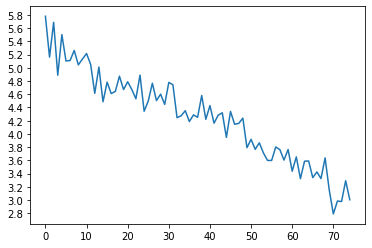

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 7500, print_every=500)

In [24]:
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

In [25]:
evaluateRandomly(encoder1, attn_decoder1)

> 바이러스를 옮기는 총채벌레를 방제하기 위해서는 적용약제를 3∼5일 간격으로 발생초기부터 식물체 전체에 골고루 살포하거나, 병이 발생된 시설 하우스는 작물 재배 전에 토양소독을 실시해야 한다 .
= in order to control the thrips that carry the virus, the applied pharmaceuticals should be spread evenly throughout the plant every three to five days from the beginning of the outbreak, or the diseased facility house should be soil sterilized before planting crops .
< in order to shall prepare the government announced a plan to the and and of in the the . of of the the and and of the <EOS>

> 인천국제공항에서 스케이트를 탈 수 있다고 들었어요 .
= i heard that it's possible to skate at the incheon international airport .
< i can't to to to to to to the to with to to the . to . to the . to . that <EOS>

> 대책기간 동안 여름 휴가객의 약 64 .6%가 집중되고, 특히 28일부터 다음달 3일까지 7일간 이동수요의 40 .8%가 집중될 전망이다 .
= it is